In [15]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from kmodes.kprototypes import KPrototypes
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [2]:
data = pd.read_csv('C:/Users/atirkey/OneDrive/airflow/cleaned_data.csv')

In [3]:
data.head()

,STORE,STATE,STORE_TYPE,AREA,COUNTRY,AVERAGE_BASKET_SIZE,NO_OF_TRANSACTIONS,AVG_BASKET_DOLLARS,TOTAL_SALES_UNITS,TOTAL_SALES_DOLLARS
0,1074,NSW,KMART,Satellite City/Regional City,AUSTRALIA,4.626419,821532,35.233343,3955732,28945318.76
1,1022,W.A,KMART,Middle Metro,AUSTRALIA,4.761170,823819,38.876479,4155395,32027181.97
2,1275,QLD,KMART,Middle Metro,AUSTRALIA,4.937985,717326,39.095888,3622351,28044496.71
3,1148,QLD,KMART,Satellite City/Regional City,AUSTRALIA,4.385563,1281232,33.482181,5819144,42898442.12
4,1104,N.T,KMART,Remote,AUSTRALIA,6.093344,421301,53.169664,2663720,22400432.81


##### Created a new dataframe using only two continuous variables columns and 10 rows

In [10]:
new_data = data[['NO_OF_TRANSACTIONS', 'TOTAL_SALES_DOLLARS']].iloc[:10]

# "STORE" is the target column
target = data['STORE'].iloc[:10]

# Combining the new_data and target into a new dataframe
new_df = new_data.copy()
new_df['STORE'] = target.values

print(new_df)

   NO_OF_TRANSACTIONS  TOTAL_SALES_DOLLARS  STORE
0              821532          28945318.76   1074
1              823819          32027181.97   1022
2              717326          28044496.71   1275
3             1281232          42898442.12   1148
4              421301          22400432.81   1104
5              700985          27459075.18   1047
6              117208           3475218.21   3320
7              112038           3651759.10   3340
8              749873          23572346.87   1084
9              694780          24348080.81   1220


In [11]:
#Normalizing the variables using MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(new_data)

# Converting the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=new_data.columns)
print(scaled_df)

   NO_OF_TRANSACTIONS  TOTAL_SALES_DOLLARS
0            0.606823             0.646068
1            0.608779             0.724242
2            0.517697             0.623218
3            1.000000             1.000000
4            0.264510             0.480052
5            0.503721             0.608369
6            0.004422             0.000000
7            0.000000             0.004478
8            0.545534             0.509779
9            0.498413             0.529456


# K-Means
##### K-Means algorithm is used to group data into clusters based on similarity. It works by iteratively assigning data points to clusters and adjusting the cluster centers to minimize the variation within each group.

### Elbow Graph
##### The elbow graph is a method used to determine the optimal number of clusters (k) in clustering algorithms like K-Means. It plots the within-cluster sum of squares (inertia) against the number of clusters.The "elbow" point, where the rate of decrease slows significantly, indicates the optimal k.

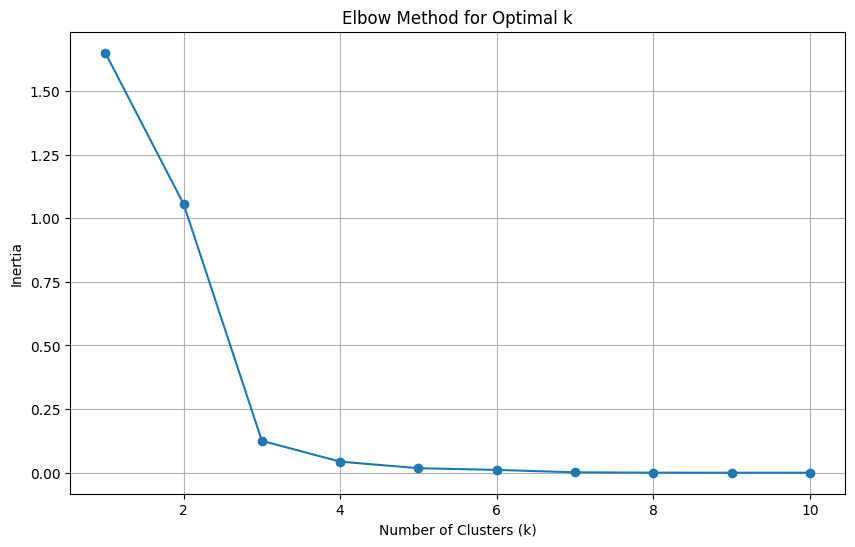

In [19]:
# Determining the optimal number of clusters using the elbow method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [20]:
# Performing K-means clustering with an optimal number of k(clusters)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
new_df['Cluster'] = kmeans.fit_predict(scaled_df)

### Silhouette Score
##### The silhouette score is a metric used to evaluate the quality of clustering. It measures how well each data point fits within its assigned cluster compared to other clusters. The score ranges from -1 to 1, where a value close to 1 indicates well-defined and separated clusters, 0 indicates overlapping clusters, and negative values suggest incorrect clustering

In [21]:
# Calculating silhouette score
sil_score = silhouette_score(scaled_df, new_df['Cluster'])
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.6831343036701341


### Cluster Visualization

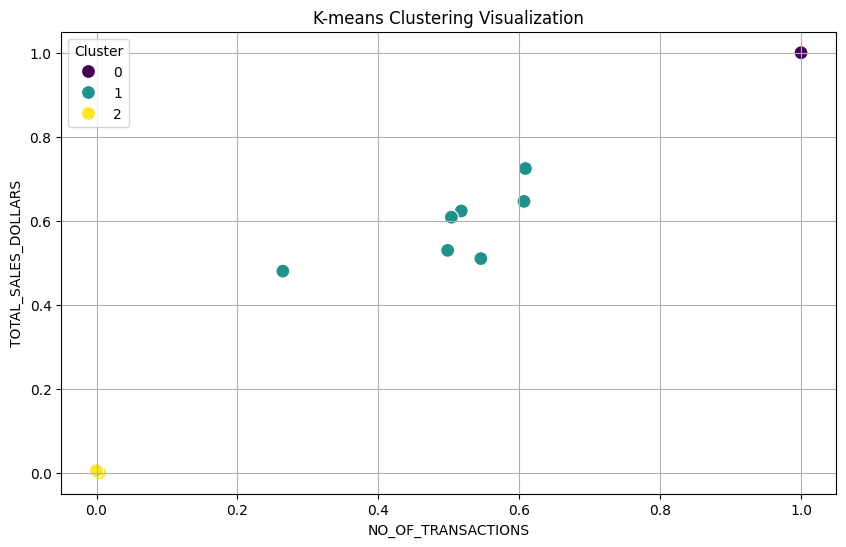

In [23]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=scaled_df['NO_OF_TRANSACTIONS'], y=scaled_df['TOTAL_SALES_DOLLARS'],
    hue=new_df['Cluster'], palette='viridis', s=100
)
plt.title('K-means Clustering Visualization')
plt.xlabel('NO_OF_TRANSACTIONS')
plt.ylabel('TOTAL_SALES_DOLLARS')
plt.legend(title='Cluster')
plt.grid()
plt.show()

# K-Means++
##### K-Means++ is an enhanced initialization method for the K-Means algorithm. It improves clustering performance by strategically selecting initial centroids to be spread out, reducing the chances of poor clustering results. Unlike random initialization, K-Means++ starts by choosing the first centroid randomly, and subsequent centroids are chosen based on their distance from already selected ones.

### Elbow Graph

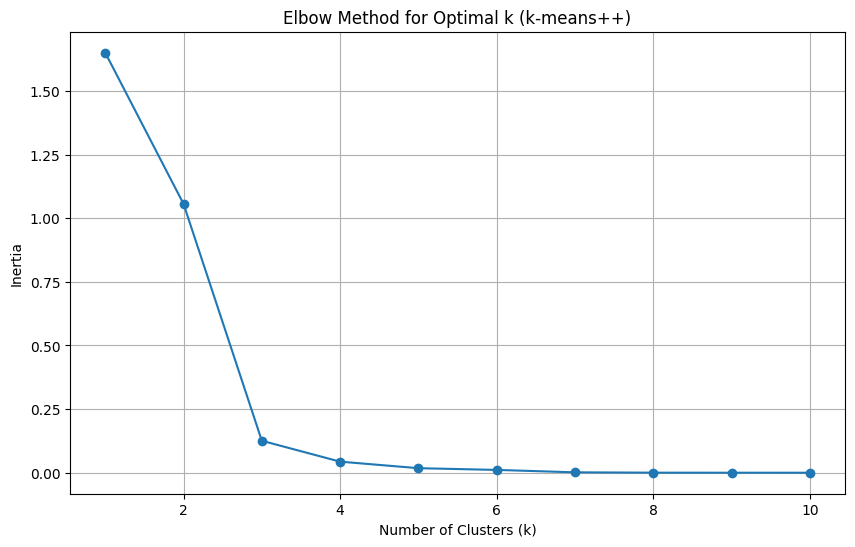

In [26]:
# Determining the optimal number of clusters using the elbow method for k-means++
inertia_kmeanspp = []
for k in k_values:
    kmeanspp = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeanspp.fit(scaled_df)
    inertia_kmeanspp.append(kmeanspp.inertia_)

# Plot the elbow graph for k-means++
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_kmeanspp, marker='o')
plt.title('Elbow Method for Optimal k (k-means++)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [27]:
# Performing K-means++ clustering with an optimal number of k (clusters)
kmeanspp_optimal = KMeans(n_clusters=3, init='k-means++', random_state=42)
new_df['Cluster'] = kmeanspp_optimal.fit_predict(scaled_df)

### Silhouette Score

In [28]:
# Calculating silhouette score for K-means++ clustering
sil_score_kmeanspp = silhouette_score(scaled_df, new_df['Cluster'])
print(f"Silhouette Score for K-means++: {sil_score_kmeanspp}")

Silhouette Score for K-means++: 0.6831343036701341


### Cluster Visualization

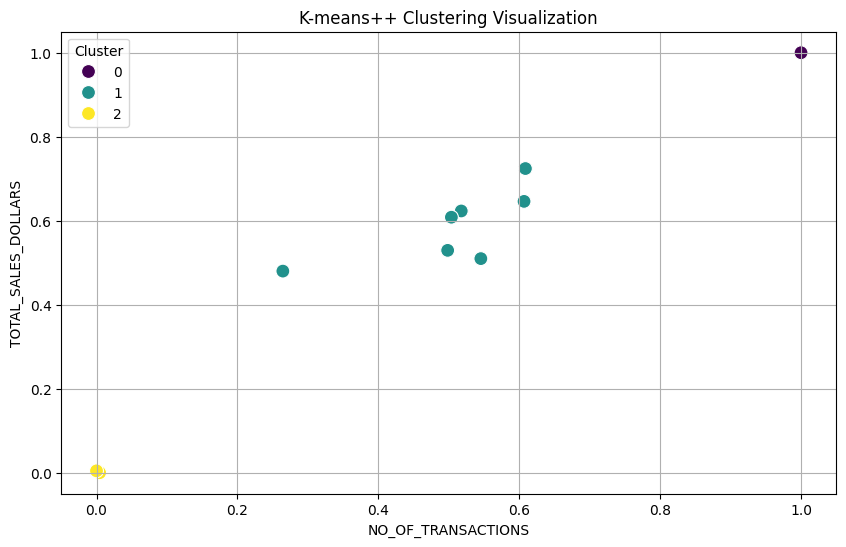

In [29]:
# Visualizing the clusters for K-means++
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=scaled_df['NO_OF_TRANSACTIONS'], y=scaled_df['TOTAL_SALES_DOLLARS'],
    hue=new_df['Cluster'], palette='viridis', s=100
)
plt.title('K-means++ Clustering Visualization')
plt.xlabel('NO_OF_TRANSACTIONS')
plt.ylabel('TOTAL_SALES_DOLLARS')
plt.legend(title='Cluster')
plt.grid()
plt.show()

##### The key difference between K-Means and K-Means++ lies in how the initial centroids are selected. K-Means initializes centroids randomly, which can lead to suboptimal clustering or slow convergence if the initial centroids are poorly chosen. K-Means++, on the other hand, uses a smarter initialization process by spreading out the centroids based on data point distances. This reduces the likelihood of poor clustering and speeds up convergence.

# Hierarchical Clustering
##### Hierarchical clustering is an unsupervised machine learning algorithm used to group data points into a hierarchy of clusters. It builds a tree-like structure, called a dendrogram, where clusters are formed by merging smaller clusters. Unlike K-Means, it doesn’t require the number of clusters to be predefined.

##### Linkage methods determine how distances between clusters are calculated in hierarchical clustering:

###### Single Linkage: Measures the distance between the closest points of two clusters. It tends to form elongated clusters and is sensitive to outliers.

###### Complete Linkage: Measures the distance between the farthest points of two clusters. It creates compact, spherical clusters and is less sensitive to outliers than single linkage.

###### Centroid Linkage: Uses the distance between the centroids (mean points) of two clusters. It balances compactness and separation but may not guarantee a monotonic hierarchy.

###### Average Linkage: Calculates the average distance between all points in two clusters. It provides a middle ground between single and complete linkage, producing balanced clusters.

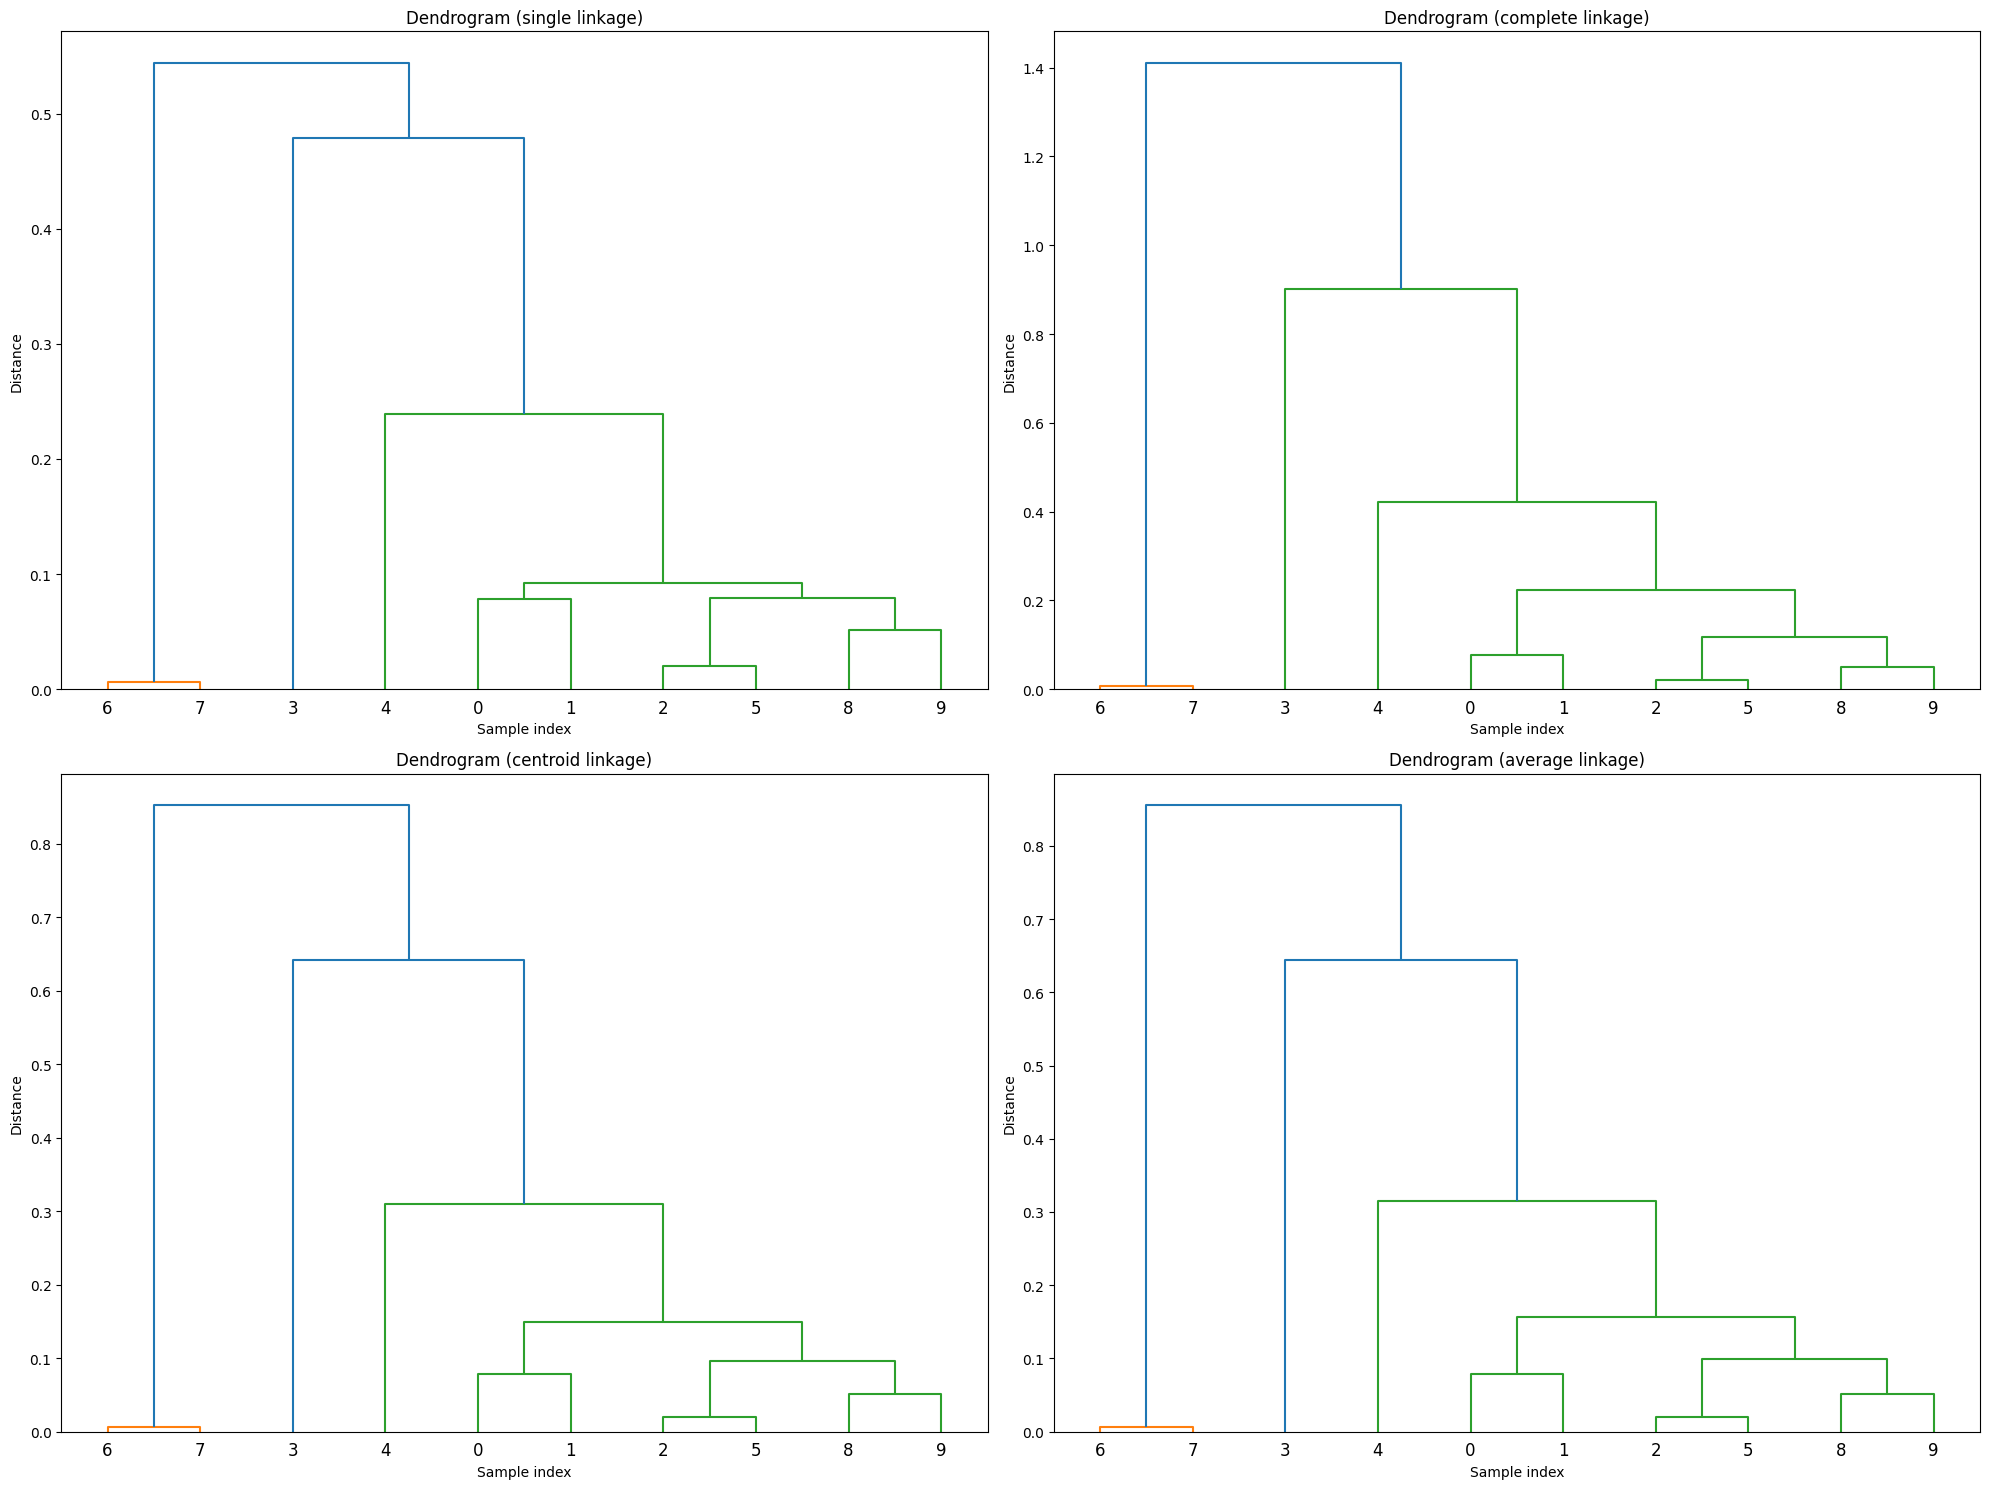

In [ ]:
# Performing hierarchical clustering using different linkage methods
linkage_methods = ['single', 'complete', 'centroid', 'average']
linkage_matrices = {}

for method in linkage_methods:
    linkage_matrices[method] = linkage(scaled_df, method=method)

# Plotting dendrograms for each linkage method
plt.figure(figsize=(20, 15))

for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i + 1)
    dendrogram(linkage_matrices[method])
    plt.title(f'Dendrogram ({method} linkage)')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()

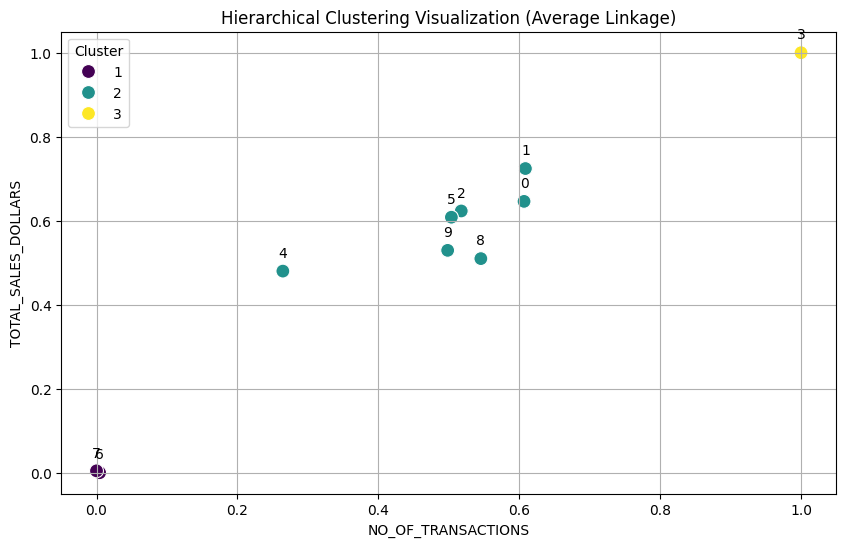

In [ ]:
# Visualizing the clusters in a scatter plot with labels
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=scaled_df['NO_OF_TRANSACTIONS'], y=scaled_df['TOTAL_SALES_DOLLARS'],
    hue=cluster_labels, palette='viridis', s=100
)

for i in range(len(scaled_df)):
    plt.annotate(i, (scaled_df['NO_OF_TRANSACTIONS'][i], scaled_df['TOTAL_SALES_DOLLARS'][i]), 
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Hierarchical Clustering Visualization (Average Linkage)')
plt.xlabel('NO_OF_TRANSACTIONS')
plt.ylabel('TOTAL_SALES_DOLLARS')
plt.legend(title='Cluster')
plt.grid()
plt.show()


# DBSCAN Algorithm
##### DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is an unsupervised clustering algorithm that groups data points based on density. It doesn’t require the number of clusters to be specified beforehand, making it useful for datasets with varying densities, noise, and outliers. DBSCAN defines clusters as regions of high density separated by low-density regions. It uses two key parameters: the ε (epsilon) radius, which determines the neighborhood size, and min_samples, the minimum number of points required to form a dense region.

Silhouette Score for DBSCAN: 0.6831343036701341


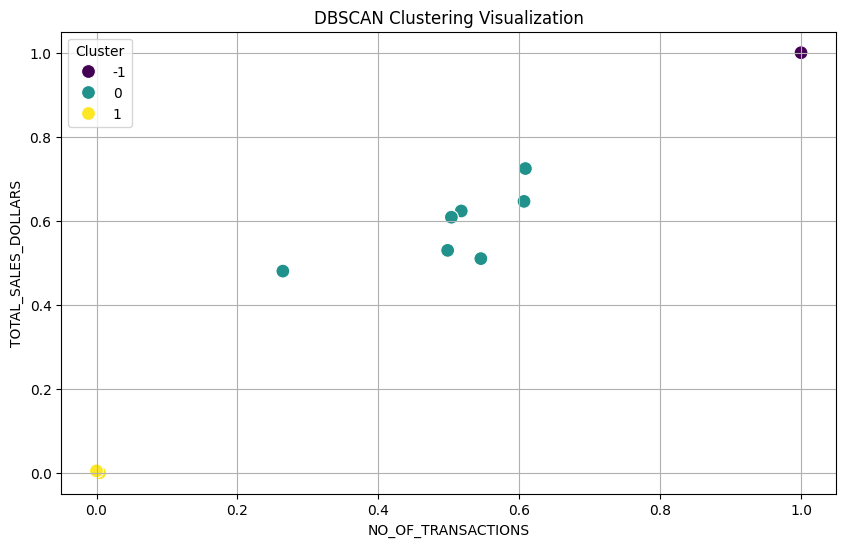

In [39]:
dbscan = DBSCAN(eps=0.3, min_samples=2)
new_df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_df)

# Calculate silhouette score for DBSCAN clustering
sil_score_dbscan = silhouette_score(scaled_df, new_df['DBSCAN_Cluster'])
print(f"Silhouette Score for DBSCAN: {sil_score_dbscan}")

# Visualize the clusters for DBSCAN
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=scaled_df['NO_OF_TRANSACTIONS'], y=scaled_df['TOTAL_SALES_DOLLARS'],
    hue=new_df['DBSCAN_Cluster'], palette='viridis', s=100
)
plt.title('DBSCAN Clustering Visualization')
plt.xlabel('NO_OF_TRANSACTIONS')
plt.ylabel('TOTAL_SALES_DOLLARS')
plt.legend(title='Cluster')
plt.grid()
plt.show()